In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0301).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.555249512195587e-12

In [6]:
data['k_no_ch3o2'].median()

8.191299915313723e-12

In [7]:
data['k_o3_oh'].median()

6.167295798659324e-14

In [8]:
data['k_o3_ho2'].median()

1.805485290327477e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.733564591122371e-13

In [10]:
data['a'] = 2*data['k_ho2_ho2']
data['b'] = data['k_o3_ho2']*data['o3_mole'] + data['k_no_ho2']*data['no_mole']
data['c'] = -data['lossco_mole'] - data['k_o3_oh']*data['o3_mole']*data['oh_mole']

In [11]:
data['ho2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['ho2_mole'].describe()

count    9.720000e+05
mean     8.845792e+07
std      9.758661e+07
min      4.667673e-01
25%      7.867536e+06
50%      5.037379e+07
75%      1.424472e+08
max      6.021570e+08
Name: ho2_mole, dtype: float64

In [13]:
data['oh_mole'].describe()

count    9.720000e+05
mean     1.088914e+06
std      1.130226e+06
min      8.017235e-01
25%      1.339569e+05
50%      7.041921e+05
75%      1.813829e+06
max      9.615703e+06
Name: oh_mole, dtype: float64

In [14]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    972000.000000
mean        160.413869
std         188.892186
min           0.025193
25%          51.717374
50%         128.976370
75%         199.216273
max        2920.163605
Name: ratio_ho2_oh, dtype: float64

In [15]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    972000.000000
mean          0.387912
std           0.190519
min           0.000690
25%           0.261948
50%           0.412561
75%           0.512633
max           2.760024
Name: P1_frac, dtype: float64

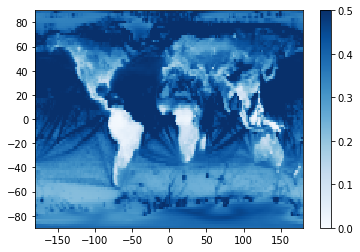

In [16]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P1_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [17]:
data_mean['P1_frac'].describe()

count    16200.000000
mean         0.387912
std          0.118280
min          0.010487
25%          0.312793
50%          0.392688
75%          0.479229
max          0.763222
Name: P1_frac, dtype: float64

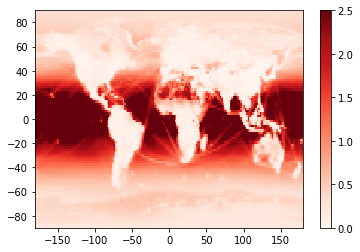

In [18]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ho2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [19]:
data = data.drop(['a','b','c'], axis=1)
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,k_oh_no2,o3prod_mole,o3loss_mole,lossch4_mole,lossco_mole,k_ch3o2_ch3o2,ho2_mole,ratio_ho2_oh,P1,P1_frac
0,1.0,-89.0,1.0,911.0,1.589701e-08,8.802798e-14,9.406584e-14,0.000000e+00,0.000000e+00,249.57623,...,6.500000e-11,53010.449556,56646.448848,31984.018699,76916.025110,4.446147e-13,5.405122e+07,82.900680,39134.321994,0.738238
1,3.0,-89.0,1.0,2911.0,1.590375e-08,8.794498e-14,9.389479e-14,0.000000e+00,0.000000e+00,249.54080,...,6.500000e-11,52960.466956,56543.445549,31907.818720,76799.999236,4.447070e-13,5.395636e+07,82.775999,39112.045101,0.738514
2,5.0,-89.0,1.0,4911.0,1.591221e-08,8.791484e-14,9.379763e-14,0.000000e+00,0.000000e+00,249.50958,...,6.500000e-11,52942.316648,56484.932786,31854.920869,76731.215952,4.447884e-13,5.388939e+07,82.685494,39103.349592,0.738603
3,7.0,-89.0,1.0,6911.0,1.594265e-08,8.803169e-14,9.397011e-14,0.000000e+00,0.000000e+00,249.49193,...,6.500000e-11,53012.686127,56588.800242,31888.690439,76880.049682,4.448344e-13,5.392530e+07,82.599367,39182.495504,0.739115
4,9.0,-89.0,1.0,8911.0,1.596177e-08,8.795628e-14,9.384050e-14,0.000000e+00,0.000000e+00,249.46387,...,6.500000e-11,52967.271816,56510.749100,31824.126168,76790.984302,4.449076e-13,5.383872e+07,82.464109,39163.811414,0.739396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,1.630996e-08,2.842892e-16,1.809345e-16,3.336417e-13,6.572778e-15,242.57967,...,6.500000e-11,171.198938,108.958780,14.119311,92.707287,4.637703e-13,5.464829e+04,421.592024,58.862575,0.343826
971996,-7.0,89.0,60.0,-6911.0,1.632853e-08,2.287422e-16,1.680337e-16,1.499039e-13,2.951658e-15,242.59355,...,6.500000e-11,137.748571,101.189912,12.736248,83.796618,4.637303e-13,6.548010e+04,508.206881,42.730944,0.310210
971997,-5.0,89.0,60.0,-4911.0,1.634956e-08,1.920444e-16,1.595247e-16,1.640803e-14,3.207111e-16,242.60947,...,6.500000e-11,115.649126,96.065768,11.825190,78.041308,4.636846e-13,7.779707e+04,609.362862,28.737748,0.248491
971998,-3.0,89.0,60.0,-2911.0,1.636259e-08,2.303925e-16,1.698968e-16,3.794615e-14,7.451860e-16,242.61600,...,6.500000e-11,138.742339,102.311859,12.934571,85.483982,4.636658e-13,7.363227e+04,555.693111,38.987410,0.281006


In [20]:
list(data)

['longitude',
 'latitude',
 't',
 'loc',
 'o3',
 'o3prod',
 'o3loss',
 'eminox',
 'emivoc',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'h2o',
 'pan',
 'hno3',
 'k_no_ho2',
 'k_no_ch3o2',
 'k_o1d_h2o',
 'k_o3_ho2',
 'k_o3_oh',
 'K1_NO_HO2',
 'K1_NO_CH3O2',
 'K1_O1D_H2O',
 'K1_O3_OH',
 'K1_O3_HO2',
 'K2_NO_HO2',
 'K2_NO_CH3O2',
 'K2_O1D_H2O',
 'K2_O3_OH',
 'K2_O3_HO2',
 'country',
 'o3_mole',
 'no_mole',
 'no2_mole',
 'oh_mole',
 'h2o_mole',
 'hno3_mole',
 'pan_mole',
 'k_ho2_ho2',
 'k_oh_no2',
 'o3prod_mole',
 'o3loss_mole',
 'lossch4_mole',
 'lossco_mole',
 'k_ch3o2_ch3o2',
 'ho2_mole',
 'ratio_ho2_oh',
 'P1',
 'P1_frac']

In [21]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0316).csv', index = False)